In [2]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat
from scipy.signal import hilbert
import matplotlib.pyplot as plt

In [3]:
data = loadmat('OASBUD.mat')['data'][0] # mat file is dict with header, we just want the data key (which is stored as a list of lists)
# each of the 100 data points consists of 7 arrays
# array 0: patient's unique ID
# array 1: first scan plane (first set of rf dta)
# array 2: second scan plane (second set of rf data)
# array 3: region of interest for first scan plane
# array 4: region of interest for second scan plane
# array 5: BI-RADS category (low, medium, high probability of malignancy)
# array 6: label (0 = benign, 1 = malignant)

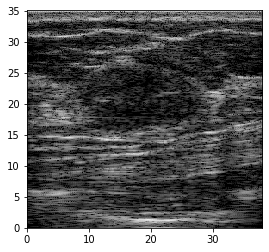

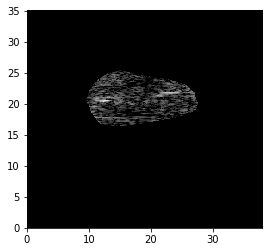

In [5]:
c = 1540
width = 38
fs = 40e6
rf1 = data[0][1]
rf2 = data[0][2]
roi1 = data[0][3]
roi2 = data[0][4]

def preprocessing(rf_data, db_threshold):
    envelope_image = np.abs(hilbert(rf_data))
    envelope_image = 20 * np.log10(envelope_image/np.max(envelope_image))
    envelope_image[envelope_image < -1.0 * db_threshold] = -1.0*db_threshold
    return 255.0*(envelope_image + db_threshold)/(db_threshold)

plt.imshow(preprocessing(rf1, 50), cmap='gray', extent=[0, width, 0, rf1.shape[0]*500*c/fs])
plt.show()

cast_image = np.multiply(preprocessing(rf1, 50), roi1)
plt.imshow(cast_image, cmap='gray', extent=[0, width, 0, rf1.shape[0]*500*c/fs])
plt.show()